## 2.1张量与自动微分

### 张量运算

#### 创建张量

In [3]:
import torch

# 从列表创建
a = torch.tensor([1, 2, 3])
print(a)  # tensor([1, 2, 3])

# 创建全零张量
b = torch.zeros((2, 3))
print(b)

# 创建随机张量
c = torch.randn((2, 2))  # 服从标准正态分布
print(c)

tensor([1, 2, 3])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[ 0.9040, -0.0691],
        [-0.2748,  1.4110]])


#### 张量的基本运算

In [4]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.tensor([[5., 6.], [7., 8.]])

# 加法
print(x + y)

# 逐元素相乘
print(x * y)

# 矩阵乘法
print(torch.matmul(x, y))

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[19., 22.],
        [43., 50.]])


#### 张量的维度操作

In [5]:
t = torch.arange(12)  # [0,1,2,...,11]
print(t.shape)  # torch.Size([12])

# reshape
t2 = t.reshape(3, 4)
print(t2)

# unsqueeze (增加一个维度)
t3 = t2.unsqueeze(0)  # 在最前面加一个batch维度
print(t3.shape)  # torch.Size([1, 3, 4])

# squeeze (去掉维度为1的维度)
t4 = t3.squeeze(0)
print(t4.shape)  # torch.Size([3, 4])

torch.Size([12])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([1, 3, 4])
torch.Size([3, 4])


#### 与numpy的转换

In [6]:
import numpy as np

arr = np.array([[1, 2], [3, 4]])
tensor_from_np = torch.from_numpy(arr)
print(tensor_from_np)

back_to_np = tensor_from_np.numpy()
print(back_to_np)

tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]


## 2.2反向传播与优化理论

### 非凸优化特性

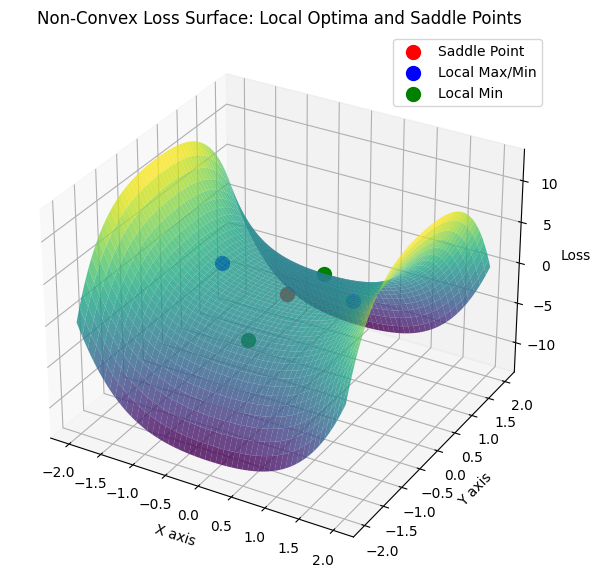

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# 构造一个简单的非凸函数
# f(x, y) = x^2 - y^2 + 0.5 * x^4 - 0.5 * y^4
# -------------------------------
def f(x, y):
    return x**2 - y**2 + 0.5*x**4 - 0.5*y**4

# 创建网格数据
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 绘制3D曲面
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# 标注关键点
# 全局最优 (大约)
ax.scatter(0, 0, f(0, 0), color='red', s=100, label='Saddle Point')
# 局部最优 (示意)
ax.scatter(1, 0, f(1, 0), color='blue', s=100, label='Local Max/Min')
ax.scatter(-1, 0, f(-1, 0), color='blue', s=100)
# 局部最小（全局极小值示意）
ax.scatter(0, 1, f(0, 1), color='green', s=100, label='Local Min')
ax.scatter(0, -1, f(0, -1), color='green', s=100)

# 设置标签
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Loss')
ax.set_title('Non-Convex Loss Surface: Local Optima and Saddle Points')
ax.legend()

plt.show()
